Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


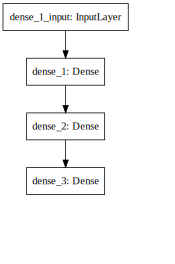

In [1]:
from keras.models import Sequential
from keras.layers import Dense
# 定義模型
model = Sequential()
model.add(Dense(10, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()  # 顯示模型摘要資訊
# 繪出模型圖片
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog="dot", format="svg"))

### Ch16_2_1.py

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout

# 定義模型
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), padding="same",
                 input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5), padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 顯示各神經層
print("神經層數: ", len(model.layers))
for i in range(len(model.layers)):
    print(i, model.layers[i].name)
print("每一層的輸入張量: ")    
for i in range(len(model.layers)):
    print(i, model.layers[i].input)  
print("每一層的輸出張量: ")    
for i in range(len(model.layers)):
    print(i, model.layers[i].output)  

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

### Ch16_2_1a.py

In [2]:
from keras.models import Sequential
from keras.models import load_model

# 建立Keras的Sequential模型
model = Sequential()
model = load_model("titanic.h5")
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 顯示各層的權重形狀
for i in range(len(model.layers)):
    print(i, model.layers[i].name, ":")
    weights = model.layers[i].get_weights()
    for j in range(len(weights)):
        print("==>", j, weights[j].shape)

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 11)                110       
_________________________________________________________________
dense_98 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 12        
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________
0 dense_97 :
==> 0 (9, 11)
==> 1 (11,)
1 dense_98 :
==> 0 (11, 11)
==> 1 (11,)
2 dense_99 :
==> 0 (11, 1)
==> 1 (1,)


### Ch16_2_1b.py

In [3]:
from keras.models import Sequential
from keras.models import load_model

# 建立Keras的Sequential模型
model = Sequential()
model = load_model("mnist.h5")
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 顯示各層的權重形狀
for i in range(len(model.layers)):
    print(i, model.layers[i].name, ":")
    weights = model.layers[i].get_weights()
    for j in range(len(weights)):
        print("==>", j, weights[j].shape)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)             

### Ch16_2_1c.py

In [4]:
from keras.models import Sequential
from keras.models import load_model

# 建立Keras的Sequential模型
model = Sequential()
model = load_model("imdb_rnn.h5")
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="rmsprop", 
              metrics=["accuracy"])
# 顯示SimpleRNN層的權重形狀
print(2, model.layers[2].name, ":")
weights = model.layers[2].get_weights()
for i in range(len(weights)):
    print("==>", i, weights[i].shape)

/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           32000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 34,113
Trainable params: 34,113
Non-trainable params: 0
_________________________________________________________________
2 simple_rnn_1 :
==> 0 (32, 32)
==> 1 (32, 32)
==> 2 (32,)


### Ch16_2_1d.py

In [6]:
from keras.models import Sequential
from keras.models import load_model

# 建立Keras的Sequential模型
model = Sequential()
model = load_model("imdb_lstm.h5")
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="rmsprop", 
              metrics=["accuracy"])
# 顯示LSTM層的權重形狀
print(2, model.layers[2].name, ":")
weights = model.layers[2].get_weights()
for i in range(len(weights)):
    print("==>", i, weights[i].shape)

/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           32000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 40,353
Trainable params: 40,353
Non-trainable params: 0
_________________________________________________________________
2 lstm_1 :
==> 0 (32, 128)
==> 1 (32, 128)
==> 2 (128,)


### Ch16_2_1e.py

In [8]:
from keras.models import Sequential
from keras.models import load_model

# 建立Keras的Sequential模型
model = Sequential()
model = load_model("imdb_gru.h5")
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="rmsprop", 
              metrics=["accuracy"])
# 顯示GRU層的權重形狀
print(2, model.layers[2].name, ":")
weights = model.layers[2].get_weights()
for i in range(len(weights)):
    print("==>", i, weights[i].shape)

/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 32)           32000     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 38,273
Trainable params: 38,273
Non-trainable params: 0
_________________________________________________________________
2 gru_1 :
==> 0 (32, 96)
==> 1 (32, 96)
==> 2 (96,)


### Ch16_2_2.py

載入模型...
神經層數:  9
0 conv2d_1
1 max_pooling2d_1
2 conv2d_2
3 max_pooling2d_2
4 dropout_2
5 flatten_1
6 dense_51
7 dropout_3
8 dense_52
(5, 5, 1, 16)


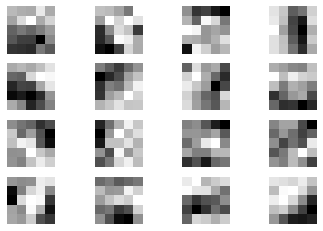

In [10]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (_, _) = mnist.load_data()
# 將圖片轉換成 4D 張量
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
# 建立Keras的Sequential模型
model = Sequential()
print("載入模型...")
model = load_model("mnist.h5")
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 顯示各神經層
print("神經層數: ", len(model.layers))
for i in range(len(model.layers)):
    print(i, model.layers[i].name)
# 第1個 Conv2D 的 filters 形狀
print(model.layers[0].get_weights()[0].shape)
# 繪出第1個 Conv2D 的 16 個 filters
weights = model.layers[0].get_weights()[0]
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(weights[:,:,0,i], cmap="gray", 
               interpolation="none")
    plt.axis("off")

### Ch16_2_2a.py

載入模型...
神經層數:  9
0 conv2d_1
1 max_pooling2d_1
2 conv2d_2
3 max_pooling2d_2
4 dropout_2
5 flatten_1
6 dense_51
7 dropout_3
8 dense_52
(5, 5, 16, 32)


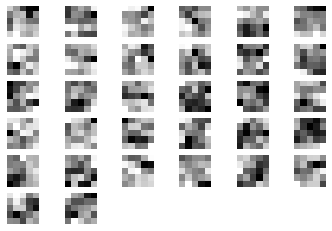

In [11]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import load_model
import matplotlib.pyplot as plt
# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (_, _) = mnist.load_data()
# 將圖片轉換成 4D 張量
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
# 建立Keras的Sequential模型
model = Sequential()
print("載入模型...")
model = load_model("mnist.h5")
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 顯示各神經層
print("神經層數: ", len(model.layers))
for i in range(len(model.layers)):
    print(i, model.layers[i].name)
# 第2個 Conv2D 的 filters 形狀
print(model.layers[2].get_weights()[0].shape)
# 繪出第2個 Conv2D 的 32 個 filters
weights = model.layers[2].get_weights()[0]
for i in range(32):
    plt.subplot(6,6,i+1)
    plt.imshow(weights[:,:,0,i], cmap="gray", 
               interpolation="none")
    plt.axis("off")    

### Ch16_2_3.py

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)             

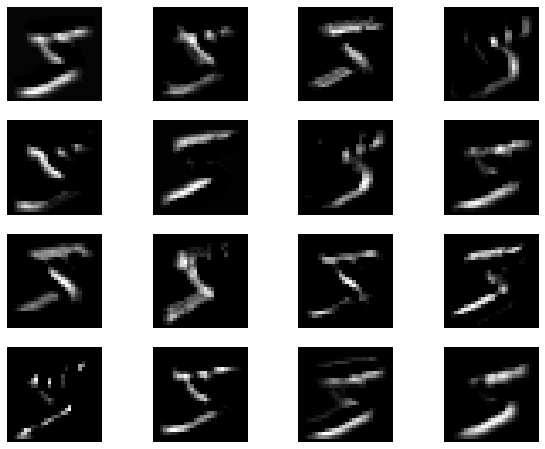

In [13]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.models import load_model
import matplotlib.pyplot as plt
# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (_, _) = mnist.load_data()
# 將圖片轉換成 4D 張量
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("mnist.h5")
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 使用 Sequential 建立 Conv2D 層
model_test = Sequential()
model_test.add(Conv2D(16, kernel_size=(5, 5), padding="same",
                 input_shape=(28, 28, 1), activation="relu"))
for i in range(len(model_test.layers)):
    model_test.layers[i].set_weights(model.layers[i].get_weights())
   
output = model_test.predict(X_train[0].reshape(1,28,28,1))
# 繪出第1個 Conv2D 層的輸出
plt.figure(figsize=(10,8))
for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(output[0,:,:,i], cmap="gray")
    plt.axis("off")

### Ch16_2_3a.py

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)             

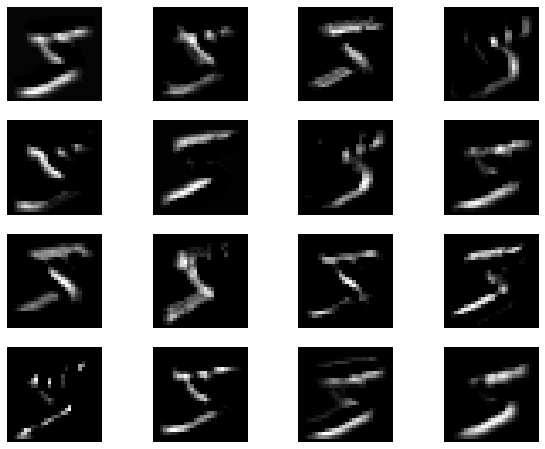

In [15]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import load_model
import matplotlib.pyplot as plt
# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (_, _) = mnist.load_data()
# 將圖片轉換成 4D 張量
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("mnist.h5")
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 使用 Model 建立 Conv2D 層
from keras.models import Model
layer_name = "conv2d_1"
model_test = Model(inputs=model.input, 
                   outputs=model.get_layer(layer_name).output)
output = model_test.predict(X_train[0].reshape(1,28,28,1))
# 繪出第1個 Conv2D 層的輸出
plt.figure(figsize=(10,8))
for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(output[0,:,:,i], cmap="gray")
    plt.axis("off")

### Ch16_2_3b.py

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)             

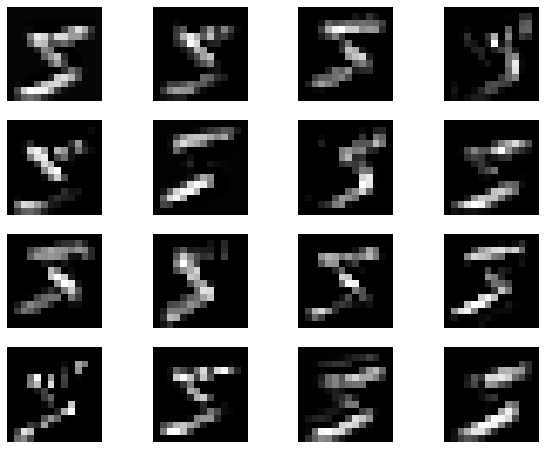

In [16]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.models import load_model
import matplotlib.pyplot as plt
# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (_, _) = mnist.load_data()
# 將圖片轉換成 4D 張量
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("mnist.h5")
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 使用 Sequential 建立 Conv2D 和 MaxPooling 層
model_test = Sequential()
model_test.add(Conv2D(16, kernel_size=(5, 5), padding="same",
                 input_shape=(28, 28, 1), activation="relu"))
model_test.add(MaxPooling2D(pool_size=(2, 2)))
for i in range(len(model_test.layers)):
    model_test.layers[i].set_weights(model.layers[i].get_weights())
output = model_test.predict(X_train[0].reshape(1,28,28,1))
# 繪出第1層 MaxPooling 層的輸出
plt.figure(figsize=(10,8))
for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(output[0,:,:,i], cmap="gray")
    plt.axis("off")

### Ch16_2_3c.py

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)             

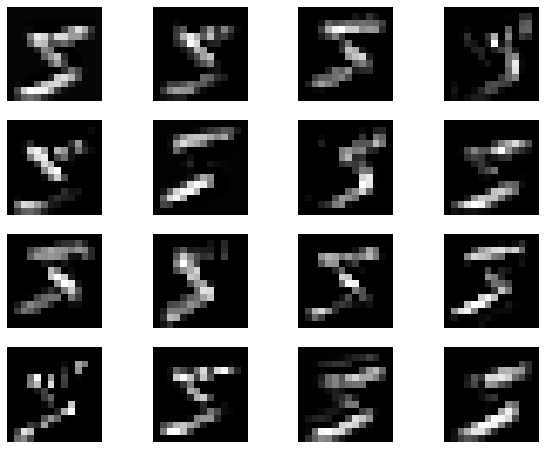

In [17]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import load_model
import matplotlib.pyplot as plt
# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (_, _) = mnist.load_data()
# 將圖片轉換成 4D 張量
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("mnist.h5")
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 使用 Model 建立 Conv2D 和 MaxPooling 層
from keras.models import Model
layer_name = "max_pooling2d_1"
model_test = Model(inputs=model.input, 
                   outputs=model.get_layer(layer_name).output)
output = model_test.predict(X_train[0].reshape(1,28,28,1))
# 繪出第1層 MaxPooling 層的輸出
plt.figure(figsize=(10,8))
for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(output[0,:,:,i], cmap="gray")
    plt.axis("off")

### Ch16_3.py

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 將圖片轉換成 4D 張量
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255
# One-hot編碼
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
# 定義模型
mnist_input = Input(shape=(28, 28, 1), 
                    name="input")
conv1 = Conv2D(16, kernel_size=(5, 5), padding="same",
               activation="relu", name="conv1")(mnist_input)
pool1 = MaxPooling2D(pool_size=(2, 2),
                     name="pool1")(conv1)
conv2 = Conv2D(32, kernel_size=(5, 5), padding="same",
               activation="relu", name="conv2")(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2),
                     name="pool2")(conv2)
drop1 = Dropout(0.5, name="drop1")(pool2)
flat = Flatten(name="flat")(drop1)
hidden1 = Dense(128, activation="relu", name="hidden1")(flat)
drop2 = Dropout(0.5, name="drop2")(hidden1)
output = Dense(10, activation="softmax",
               name="output")(drop2)
model = Model(inputs=mnist_input, outputs=output)
model.summary()   # 顯示模型摘要資訊
from keras.utils import plot_model

plot_model(model, to_file="Ch16_3.png", show_shapes=True)
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=10, batch_size=128, verbose=0)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 16)        416       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 32)        12832     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 7, 7, 32)          0         
_________________________________________________________________
drop1 (Dropout)              (None, 7, 7, 32)          0         
_________________________________________________________________
flat (Flatten)               (None, 1568)              0   

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Model
from keras.layers import Dense, Input, Dropout, Embedding, LSTM

seed = 10
np.random.seed(seed)  # 指定亂數種子
# 載入 IMDb 資料集
top_words = 1000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(
                                num_words=top_words)
# 資料預處理
max_words = 100
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# 定義模型
imdb_input = Input(shape=(100,), dtype="int32",
                   name="imdb_input")
embed = Embedding(top_words, 32, input_length=max_words,
                    name="embed")(imdb_input)
drop1 = Dropout(0.25, name="drop1")(embed)
lstm = LSTM(32, name="lstm")(drop1)
drop2 = Dropout(0.25, name="drop2")(lstm)
output = Dense(1, activation="sigmoid", 
               name="output")(drop2)
model = Model(inputs=imdb_input, outputs=output)
model.summary()   # 顯示模型摘要資訊
from keras.utils import plot_model

plot_model(model, to_file="Ch16_3a.png", show_shapes=True)
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="rmsprop", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=5, batch_size=128, verbose=2)
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["acc"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Ch16_4_1.py

Using TensorFlow backend.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 60, 60, 16)   416         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 31, 31, 32)   0           conv2d_1[0][0]                   
____________________________________________________________________________________________

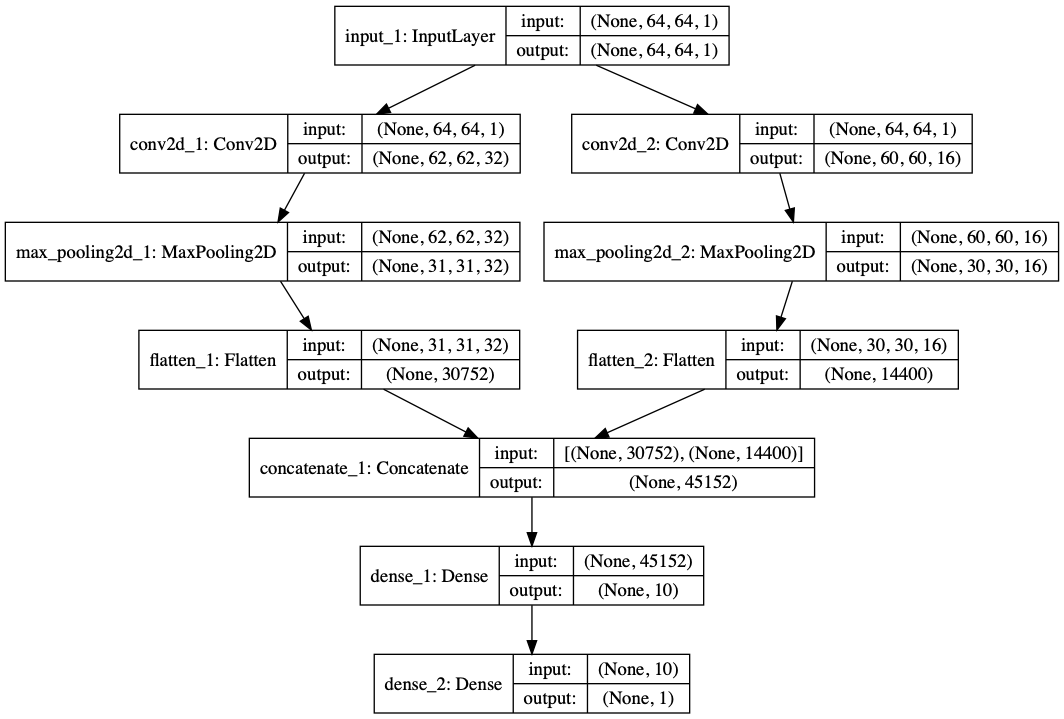

In [2]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.merge import concatenate

# 定義模型
shared_input = Input(shape=(64, 64, 1))
# 第1個共享輸入層的卷積和池化層
conv1 = Conv2D(32, kernel_size=3, activation="relu")(shared_input)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)
# 第2個共享輸入層的卷積和池化層
conv2 = Conv2D(16, kernel_size=5, activation="relu")(shared_input)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)
# 合併 2 個共享輸入層的卷積和池化層
merge = concatenate([flat1, flat2])
hidden1 = Dense(10, activation="relu")(merge)
output = Dense(1, activation="sigmoid")(hidden1)
model = Model(inputs=shared_input, outputs=output)
model.summary()   # 顯示模型摘要資訊
from keras.utils import plot_model

plot_model(model, to_file="Ch16_4_1.png", show_shapes=True)

### Ch16_4_2.py

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 100, 1)       0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 32)           4352        input_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 16)           528         lstm_1[0][0]                     
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 32)           544         dense_4[0][0]                    
____________________________________________________________________________________________

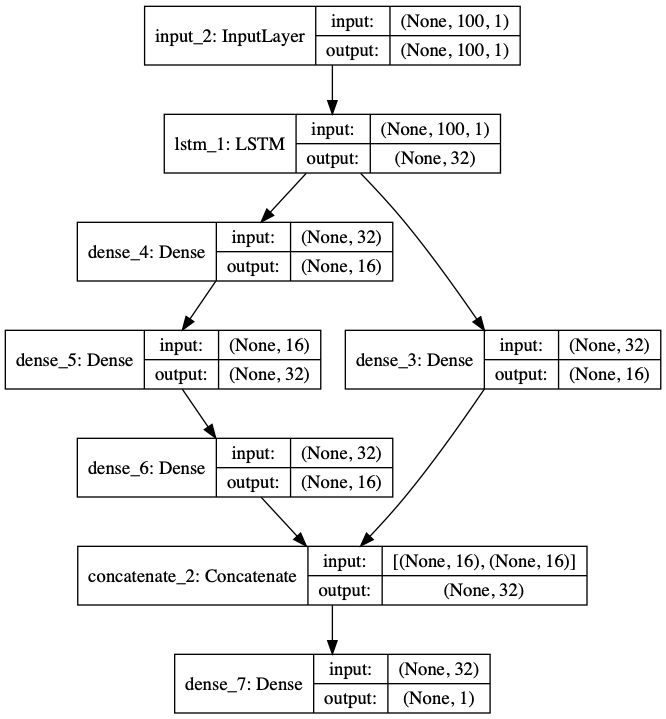

In [5]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM
from keras.layers.merge import concatenate

# 定義模型
model_input = Input(shape=(100, 1))
lstm = LSTM(32)(model_input)
# 第 1 個共享特徵提取層的解釋層
extract1 = Dense(16, activation="relu")(lstm)
# 第 2 個共享特徵提取層的解釋層
dense1 = Dense(16, activation="relu")(lstm)
dense2 = Dense(32, activation="relu")(dense1)
extract2 = Dense(16, activation='relu')(dense2)
# 合併 2 個共享特徵提取層的解釋層
merge = concatenate([extract1, extract2])
output = Dense(1, activation="sigmoid")(merge)
model = Model(inputs=model_input, outputs=output)
model.summary()   # 顯示模型摘要資訊
from keras.utils import plot_model

plot_model(model, to_file="Ch16_4_2.png", show_shapes=True)

### Ch16_5_1.py

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            (None, 28, 28, 3)    0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 26, 26, 16)   160         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 26, 26, 16)   448         input_7[0][0]                    
____________________________________________________________________________________________

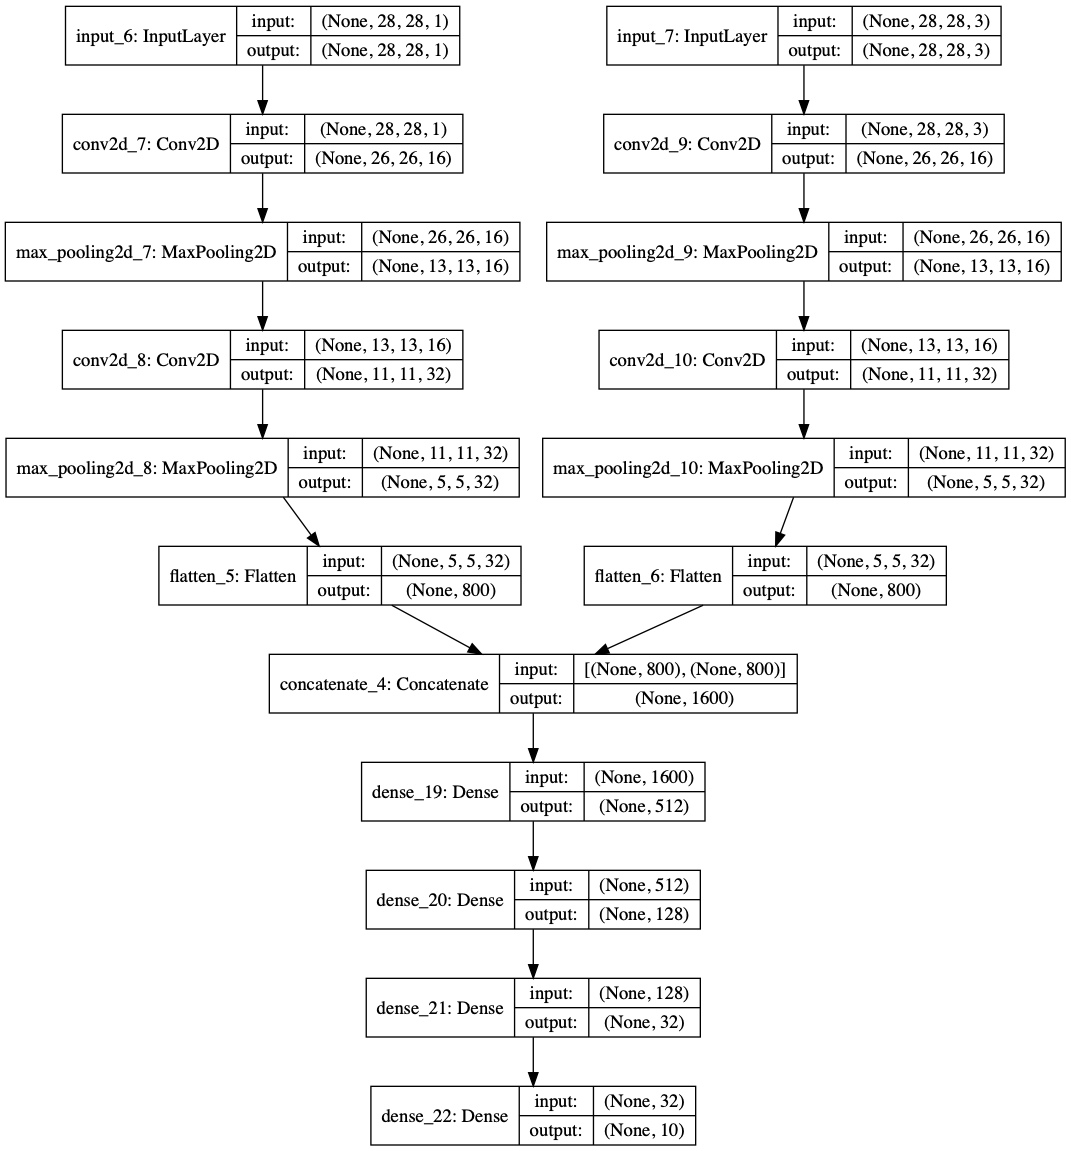

In [13]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.merge import concatenate

# 定義模型
# 第 1 個灰階圖片輸入
input1 = Input(shape=(28, 28, 1))
conv11 = Conv2D(16, (3,3), activation="relu")(input1)
pool11 = MaxPooling2D(pool_size=(2,2))(conv11)
conv12 = Conv2D(32, (3,3), activation="relu")(pool11)
pool12 = MaxPooling2D(pool_size=(2,2))(conv12)
flat1 = Flatten()(pool12)
# 第 2 個彩色圖片輸入
input2 = Input(shape=(28, 28, 3))
conv21 = Conv2D(16, (3,3), activation="relu")(input2)
pool21 = MaxPooling2D(pool_size=(2,2))(conv21)
conv22 = Conv2D(32, (3,3), activation="relu")(pool21)
pool22 = MaxPooling2D(pool_size=(2,2))(conv22)
flat2 = Flatten()(pool22)
# 合併 2 個輸入
merge = concatenate([flat1, flat2])
dense1 = Dense(512, activation="relu")(merge)
dense2 = Dense(128, activation="relu")(dense1)
dense3 = Dense(32, activation="relu")(dense2)
output = Dense(10, activation="softmax")(dense3)
# 定義多輸入模型
model = Model(inputs=[input1, input2], outputs=output)
model.summary()   # 顯示模型摘要資訊
from keras.utils import plot_model

plot_model(model, to_file="Ch16_5_1.png", show_shapes=True)

### Ch16_5_2.py

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 512)          401920      input_8[0][0]                    
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 128)          65664       dense_23[0][0]                   
__________________________________________________________________________________________________
dense_25 (Dense)                (None, 32)           4128        dense_24[0][0]                   
____________________________________________________________________________________________

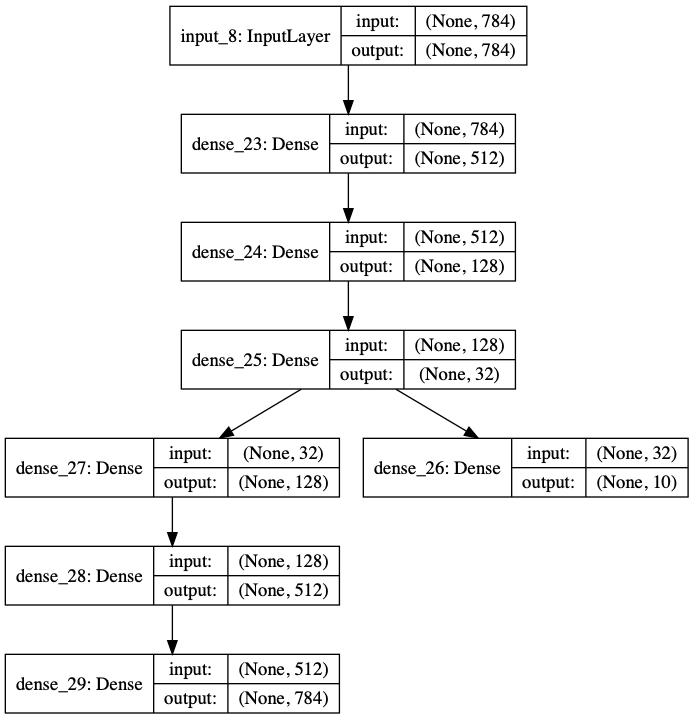

In [14]:
from keras.models import Model
from keras.layers import Dense, Input
 
# 定義模型
model_input = Input(shape = (784,))
dense1 = Dense(512, activation="relu")(model_input)
dense2 = Dense(128, activation="relu")(dense1)
dense3 = Dense(32, activation ="relu")(dense2)
# 第 1 個分類輸出
output = Dense(10, activation="softmax")(dense3)
# 第 2 個自編碼器輸出
up_dense1 = Dense(128, activation="relu")(dense3)
up_dense2 = Dense(512, activation="relu")(up_dense1)
decoded_outputs = Dense(784)(up_dense2)
# 定義多輸出模型
model = Model(model_input, [output, decoded_outputs])
model.summary()   # 顯示模型摘要資訊
from keras.utils import plot_model

plot_model(model, to_file="Ch16_5_2.png", show_shapes=True)

### Ch16_5_2a.py

In [11]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import load_model
import matplotlib.pyplot as plt
# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (_, _) = mnist.load_data()
# 將圖片轉換成 4D 張量
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
# 建立Keras的Sequential模型
model = Sequential()
model = load_model("mnist.h5")
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 使用 Model 建立 前4層的 Conv2D 和 MaxPooling 層
from keras.models import Model
# 此模型是 1 個輸入, 和 4 個輸出
layer_outputs = [layer.output for layer in model.layers[:4]]
model_test = Model(inputs=model.input, 
                   outputs=layer_outputs)

outputs = model_test.predict(X_train[0].reshape(1,28,28,1))
# 取得第1個 Conv2D 的輸出
output = outputs[0]
# 繪出第1個 Conv2D 層的輸出
plt.figure(figsize=(10,8))
for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(output[0,:,:,i], cmap="gray")
    plt.axis("off")
# 取得第1個 MaxPooling 的輸出
output = outputs[1]
# 繪出第1個 MaxPooling 層的輸出
plt.figure(figsize=(10,8))
for i in range(0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(output[0,:,:,i], cmap="gray")
    plt.axis("off")
# 取得第2個 Conv2D 的輸出
output = outputs[2]
# 繪出第2個 Conv2D 層的輸出
plt.figure(figsize=(10,8))
for i in range(0,32):
    plt.subplot(6,6,i+1)
    plt.imshow(output[0,:,:,i], cmap="gray")
    plt.axis("off")
# 取得第2個 MaxPooling 的輸出
output = outputs[3]
# 繪出第2個 MaxPooling 層的輸出
plt.figure(figsize=(10,8))
for i in range(0,32):
    plt.subplot(6,6,i+1)
    plt.imshow(output[0,:,:,i], cmap="gray")
    plt.axis("off") 

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)             